In [1]:
# Горячие клавиши collab
# shift+enter - запуск ячейки
# control+m   - входим в режим горяч клавиш
# d           - удалить ячейку
# b           - добавить ячейку под
# u           - добавить ячейку над
# m           - перевести ячейку в markdown
# y           - перевестия чеку в код


# F-строка
variable = 5
f"Мне {variable} лет"

# pd.options.display.max_rows = 100
# pd.options.display.max_columns = 100

'Мне 5 лет'

In [2]:
# панды
import pandas as pd
# сиборн
import matplotlib.pyplot as plt
import seaborn as sns
# импортируем коэффициент phik
! pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 5.5 MB/s eta 0:00:00


Датасет бу авто: https://drive.google.com/file/d/1SVntexHtshbVTotXk2z525whWcvcOxXy/view?usp=sharing

In [3]:
# загрузили файл с гугл-диска
! gdown --id 1SVntexHtshbVTotXk2z525whWcvcOxXy

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SVntexHtshbVTotXk2z525whWcvcOxXy
To: /content/uk_used_cars.zip
100% 1.15M/1.15M [00:00<00:00, 50.2MB/s]


In [4]:
# расзиповали файл в папку /content/uk_used_cars
! unzip /content/uk_used_cars.zip -d /content/uk_used_cars

Archive:  /content/uk_used_cars.zip
  inflating: /content/uk_used_cars/audi.csv  
  inflating: /content/uk_used_cars/bmw.csv  
  inflating: /content/uk_used_cars/cclass.csv  
  inflating: /content/uk_used_cars/focus.csv  
  inflating: /content/uk_used_cars/ford.csv  
  inflating: /content/uk_used_cars/hyundi.csv  
  inflating: /content/uk_used_cars/merc.csv  
  inflating: /content/uk_used_cars/skoda.csv  
  inflating: /content/uk_used_cars/toyota.csv  
  inflating: /content/uk_used_cars/unclean cclass.csv  
  inflating: /content/uk_used_cars/unclean focus.csv  
  inflating: /content/uk_used_cars/vauxhall.csv  
  inflating: /content/uk_used_cars/vw.csv  


In [5]:
df = pd.read_csv('/content/uk_used_cars/bmw.csv')

# df[df['model'] == ' X2'] pandas notation
# df.query('model == " X2"') query
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [6]:
# импортируем тренировочную и тестовую выборку
from sklearn.model_selection import train_test_split


In [7]:
# метод расплитовки датафрейма
# разбиение происходит ВСЕГДА случайными выборками строк, эксперимент НЕВОСПРОИЗВОДИМ

# траиновая выборка - 60%
# тестовая выборка - 40%
train, test = train_test_split(df, train_size=0.6, random_state=42) # train_size=0.7 регуляруем размер выблорки, random_state захолдить разбиение

In [8]:
# # # валидационная выборка # # #
# делим тестовую выборку на:
# валидационнная - 50% (20% от всего)
# тестовая выборка 50% (20% от всего)
val, test = train_test_split(test, train_size=0.5, random_state=42)

In [9]:
# список фичей/характеристик
train.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [10]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


In [11]:
# импортируем CatBoostRegressor так как предсказываем непрерывное значение переменной - ЗАДАЧА РЕГРЕССИИ
from catboost import CatBoostRegressor

In [12]:
# список всех фичей
X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']
# список категориальных фичей, их catboost будет преобразовывать в бинарные
cat_features = ['model', 'transmission', 'fuelType']

# у целевой признак/target
y = ['price']

In [13]:
# cat_features = cat_features - категориальные хар-ки, которые catboost должен преаброзовать
# eval_metric = 'MAPE' - считаем эффективность по проценту абсолютной ошибки
# random_seed = 42
# learning_rate = 0.4 - скорость модели обучения (что бы лучшая итерация была ближе к концу, так советуют разработчики)
# verbose = 100 - выводим каждую 100 итерацию
model = CatBoostRegressor(cat_features = cat_features,
                          eval_metric = 'MAPE', # MAE - абсолютная ошибка, RMSE - квадрат абсолютной ошибки(но не много другое математически)
                          random_seed = 42,
                          learning_rate = 0.2, # не обязательный
                          # early_stopping_rounds = 200 кол-во итерация, после которых все останавливается, взаимоиисключается с learning_rate
                          # loss_function = 'RMSE' не трогать, но можно тестить функцию ошибки, (по этому параметру приходим к нужной эффективности)
                          verbose = 100)

In [14]:
# убучаем выборку на train

# параметры: 1) фичей
#            2) тагрета
#            3) параметры валидационной выборки: фичи, таргет

model.fit(train[X], train[y], eval_set=( val[X], val[y]) )
# получим хар-ки итераций и лучшую из них

0:	learn: 0.4132042	test: 0.4095281	best: 0.4095281 (0)	total: 74.8ms	remaining: 1m 14s
100:	learn: 0.0729616	test: 0.0767315	best: 0.0766642 (99)	total: 1.65s	remaining: 14.7s
200:	learn: 0.0659946	test: 0.0728902	best: 0.0728656 (199)	total: 3.89s	remaining: 15.4s
300:	learn: 0.0619437	test: 0.0717662	best: 0.0716616 (287)	total: 5.48s	remaining: 12.7s
400:	learn: 0.0586094	test: 0.0712521	best: 0.0711971 (367)	total: 7.04s	remaining: 10.5s
500:	learn: 0.0558738	test: 0.0707353	best: 0.0705780 (464)	total: 8.8s	remaining: 8.77s
600:	learn: 0.0536221	test: 0.0701563	best: 0.0701526 (599)	total: 10.3s	remaining: 6.87s
700:	learn: 0.0517746	test: 0.0699923	best: 0.0699631 (689)	total: 12.2s	remaining: 5.19s
800:	learn: 0.0500487	test: 0.0700309	best: 0.0698699 (742)	total: 13.8s	remaining: 3.42s
900:	learn: 0.0486458	test: 0.0701198	best: 0.0698699 (742)	total: 16.1s	remaining: 1.77s
999:	learn: 0.0472114	test: 0.0702330	best: 0.0698699 (742)	total: 18.1s	remaining: 0us

bestTest = 0.06

In [15]:
# делаем предикт на test
# тут в формате np.array
model.predict(test[X])


array([57362.65554355, 22373.83440713, 14164.03116338, ...,
       30891.20766697, 13573.90025755, 25166.19555863])

In [16]:
# подставим к train столбец с предсказанием
test['predict_price'] = model.predict(test[X])
# получился стобец с предиктом цены
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,predict_price
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57362.655544
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22373.834407
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,14164.031163
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32071.887662
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35575.356359
...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,13997.298460
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30179.211998
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,30891.207667
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13573.900258


In [17]:
### Анализ модели

In [18]:
# добавим столбец с ошибкой
test['error'] = test['price'] - test['predict_price']
# добавим столбец с апбсолютной ошибкой
test['abs_error'] = abs(test['error'])

In [19]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,predict_price,error,abs_error
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57362.655544,-4372.655544,4372.655544
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22373.834407,1707.165593,1707.165593
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,14164.031163,-1165.031163,1165.031163
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32071.887662,-20076.887662,20076.887662
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35575.356359,-5700.356359,5700.356359
...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,13997.298460,1001.701540,1001.701540
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30179.211998,-503.211998,503.211998
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,30891.207667,-321.207667,321.207667
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13573.900258,1425.099742,1425.099742


<Axes: >

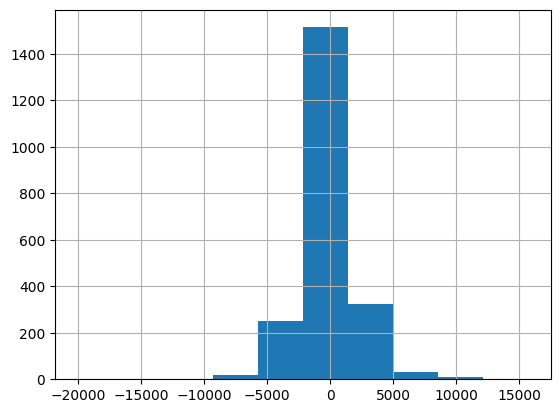

In [20]:
# распределение ошибки
test['error'].hist()


<Axes: >

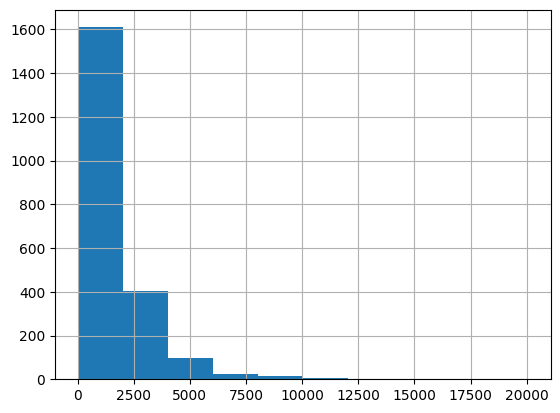

In [21]:
# распределение абсолютной ошибкий
test['abs_error'].hist()

In [22]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,predict_price,error,abs_error
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57362.655544,-4372.655544,4372.655544
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22373.834407,1707.165593,1707.165593
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,14164.031163,-1165.031163,1165.031163
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32071.887662,-20076.887662,20076.887662
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35575.356359,-5700.356359,5700.356359
...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,13997.298460,1001.701540,1001.701540
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30179.211998,-503.211998,503.211998
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,30891.207667,-321.207667,321.207667
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13573.900258,1425.099742,1425.099742


In [23]:
# найдем топ-10 с самой большой абсолютной ошибкой
# есть очень больших
t = test.sort_values(by=['abs_error'],ascending=False).head(10)
t

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,predict_price,error,abs_error
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32071.887662,-20076.887662,20076.887662
518,3 Series,2017,18298,Semi-Auto,33384,Hybrid,0,134.5,2.0,35126.815625,-16828.815625,16828.815625
1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,31803.806962,15746.193038,15746.193038
6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,27176.682716,15343.317284,15343.317284
6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,85451.529170,-14456.529170,14456.529170
2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,31190.359422,13789.640578,13789.640578
6759,4 Series,2020,42495,Semi-Auto,18,Diesel,150,58.9,2.0,30559.366118,11935.633882,11935.633882
6215,M4,2018,53999,Semi-Auto,8725,Petrol,145,33.6,3.0,42101.361059,11897.638941,11897.638941
8771,8 Series,2019,73900,Automatic,953,Petrol,145,26.9,4.4,62376.784392,11523.215608,11523.215608
4833,M4,2019,58662,Automatic,3395,Petrol,145,34.0,3.0,47469.968105,11192.031895,11192.031895


In [24]:
### Анализ модели ###

# На тесте добавим столбцы: ошибки, абсолютной ошибки
# сделаем гистогораммы по столбцам: ошибки, абсолютной ошибки

# Найдем топ 10 с самой большой абсолютной ошибкой
# Из топа 10 выберем 5 групп для понимания их средней абсолютной ошибки и ошибки

# Поймем направление ошибки

# Закатаем все это в функцию

In [25]:
# разобьем на группы по цене
test['price_group'] = pd.qcut(t['price'], 5)



In [26]:
# сгруппируем по группам цен
t = test.groupby('price_group')['abs_error', 'error'].agg(['count','mean'])

# убираем мульти индекс
t.columns = ['_'.join(col).strip() for col in t.columns.values]

# добавим среднюю ошибку по столбцу
t['error_mean_col'] = t['abs_error_mean'].mean()


# посмотрим направление ошибки в абсолютных числах
t['error_dif'] = t['abs_error_mean'] - t['error_mean_col']

# убрали 1 столбец error_count, он лишний
t = t.drop(['error_count'], axis=1)
t
# теперь увидим отклонение ценовой группы от среднего по колонке
# видно, что чем дороже, тем больше модель косит в плюс



<ipython-input-26-1cec29a1d0a4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby('price_group')['abs_error', 'error'].agg(['count','mean'])


,abs_error_count,abs_error_mean,error_mean,error_mean_col,error_dif
price_group,,,,,
"(11994.999, 37655.6]",2,18452.851644,-18452.851644,14278.990368,4173.861275
"(37655.6, 43996.0]",2,13639.475583,13639.475583,14278.990368,-639.514786
"(43996.0, 50129.6]",2,14767.916808,14767.916808,14278.990368,488.926440
"(50129.6, 61128.6]",2,11544.835418,11544.835418,14278.990368,-2734.154950
"(61128.6, 73900.0]",2,12989.872389,-1466.656781,14278.990368,-1289.117979


In [27]:
# добавим подсветку

import seaborn as sns

cm = sns.light_palette("green", as_cmap=True) # или light_palette

s = t.style.background_gradient(cmap=cm, subset=['error_dif'])
s

# видим, что средняя ошибка 1540, на дешевых авто она меньше, на дорогих больше

,abs_error_count,abs_error_mean,error_mean,error_mean_col,error_dif
price_group,,,,,
"(11994.999, 37655.6]",2,18452.851644,-18452.851644,14278.990368,4173.861275
"(37655.6, 43996.0]",2,13639.475583,13639.475583,14278.990368,-639.514786
"(43996.0, 50129.6]",2,14767.916808,14767.916808,14278.990368,488.926440
"(50129.6, 61128.6]",2,11544.835418,11544.835418,14278.990368,-2734.154950
"(61128.6, 73900.0]",2,12989.872389,-1466.656781,14278.990368,-1289.117979


In [28]:
### тоже смамое по годам ###

# сгруппируем
t = test.groupby('year')['abs_error', 'error'].agg(['count','mean'])

# убираем мульти индекс
t.columns = ['_'.join(col).strip() for col in t.columns.values]

# добавим среднюю ошибку по столбцу
t['error_mean_col'] = t['abs_error_mean'].mean()


# посмотрим направление ошибки в абсолютных числах
t['error_dif'] = t['abs_error_mean'] - t['error_mean_col']

# убрали 1 столбец error_count, он лишний
t = t.drop(['error_count'], axis=1)
cm = sns.light_palette("green", as_cmap=True) # или light_palette

s = t.style.background_gradient(cmap=cm, subset=['error_dif'])
s
# до 14-15 года авто мало и не показательно, а вот после есть тенденция, что ошибку сильно превышаем в 20 г

<ipython-input-28-cde286aa59af>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby('year')['abs_error', 'error'].agg(['count','mean'])


,abs_error_count,abs_error_mean,error_mean,error_mean_col,error_dif
year,,,,,
1996,1,6377.170030,-6377.170030,1945.871801,4431.298229
1999,1,2605.683541,-2605.683541,1945.871801,659.811741
2001,1,395.507849,-395.507849,1945.871801,-1550.363952
2002,2,4412.906061,1621.887563,1945.871801,2467.034260
2003,1,2565.065714,2565.065714,1945.871801,619.193914
2004,4,2474.280527,22.506632,1945.871801,528.408727
2006,3,1433.820166,-27.303930,1945.871801,-512.051635
2007,2,1652.816542,-1586.725931,1945.871801,-293.055259
2008,4,2991.558420,-2991.558420,1945.871801,1045.686619


In [29]:
# сделаем функцию
# функция расчитана на загрузку seaborn-а ранее
def print_error(col):
  t = test.groupby(col)['abs_error', 'error'].agg(['count','mean'])
  t.columns = ['_'.join(col).strip() for col in t.columns.values]
  t['error_mean_col'] = t['abs_error_mean'].mean()
  t['error_dif'] = t['abs_error_mean'] - t['error_mean_col']
  t = t.drop(['error_count'], axis=1)
  cm = sns.light_palette("green", as_cmap=True)
  s = t.style.background_gradient(cmap=cm, subset=['error_dif'])
  display(s)

In [30]:
# направление измения групп по трансмиссии
print_error('transmission')

<ipython-input-29-b1af45ccd28d>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby(col)['abs_error', 'error'].agg(['count','mean'])


,abs_error_count,abs_error_mean,error_mean,error_mean_col,error_dif
transmission,,,,,
Automatic,695,1483.017730,1.684918,1463.820522,19.197208
Manual,504,1091.757673,-183.980634,1463.820522,-372.062849
Semi-Auto,958,1816.686164,-154.595938,1463.820522,352.865642


In [31]:
# направление измения групп по топливу и тд
print_error('fuelType')

<ipython-input-29-b1af45ccd28d>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby(col)['abs_error', 'error'].agg(['count','mean'])


,abs_error_count,abs_error_mean,error_mean,error_mean_col,error_dif
fuelType,,,,,
Diesel,1394,1402.299182,-51.517639,1601.821073,-199.521891
Hybrid,64,1809.449789,2.519771,1601.821073,207.628716
Other,5,1403.458380,901.298504,1601.821073,-198.362693
Petrol,694,1792.076941,-248.573918,1601.821073,190.255868


In [32]:
# направление измения групп по обьему двигателя
print_error('engineSize')

<ipython-input-29-b1af45ccd28d>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby(col)['abs_error', 'error'].agg(['count','mean'])


,abs_error_count,abs_error_mean,error_mean,error_mean_col,error_dif
engineSize,,,,,
0.000000,7,1433.563192,-228.300912,2498.993153,-1065.429961
0.600000,1,872.039257,872.039257,2498.993153,-1626.953896
1.500000,278,1114.908486,-223.524250,2498.993153,-1384.084667
1.600000,24,1051.101504,-293.598276,2498.993153,-1447.891649
2.000000,1323,1444.858214,-63.845668,2498.993153,-1054.134939
2.200000,3,4331.193589,-307.997841,2498.993153,1832.200436
2.500000,4,1440.845156,-1440.845156,2498.993153,-1058.147997
2.800000,2,4491.426786,-4491.426786,2498.993153,1992.433633
3.000000,495,1927.229689,-141.139292,2498.993153,-571.763464


In [33]:
# функция для непрервыных переменных
def print_error_unbroken(col):
  test['group_need'] = pd.qcut(test[col], 5) # здесь добавить параметр , duplicates='drop' при повторяющихся значениях
  t = test.groupby('group_need')['abs_error', 'error'].agg(['count','mean'])
  t.columns = ['_'.join(col).strip() for col in t.columns.values]
  t['error_mean_col'] = t['abs_error_mean'].mean()
  t['error_dif'] = t['abs_error_mean'] - t['error_mean_col']
  t = t.drop(['error_count'], axis=1)
  cm = sns.light_palette("green", as_cmap=True)
  s = t.style.background_gradient(cmap=cm, subset=['error_dif'])
  display(s)

In [34]:
# направление измения групп по пробегу
print_error_unbroken('mileage')

<ipython-input-33-8bea0c3ff16e>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby('group_need')['abs_error', 'error'].agg(['count','mean'])


,abs_error_count,abs_error_mean,error_mean,error_mean_col,error_dif
group_need,,,,,
"(0.999, 4063.2]",432,2423.557952,-292.806946,1539.530922,884.027030
"(4063.2, 9825.4]",431,1735.857947,-91.192018,1539.530922,196.327026
"(9825.4, 24299.0]",432,1379.323768,-30.382264,1539.530922,-160.207154
"(24299.0, 43519.8]",430,1161.199109,24.574635,1539.530922,-378.331812
"(43519.8, 190000.0]",432,997.715832,-165.054917,1539.530922,-541.815090


In [35]:
# Важность характеристик для модели
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,mileage,20.947718
1,year,20.226844
2,engineSize,18.866481
3,model,16.176776
4,mpg,13.546976
5,fuelType,5.303870
6,transmission,3.607071
7,tax,1.324264


In [36]:
### Shap ###

# библиотека для изучения того сколько вклада внесла каждая фича в предикту

! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.8 MB/s eta 0:00:00


In [37]:
import shap


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [38]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X]) # массив в np.array со значениями вклада каждой фичи в каждорм наблюдении

pd.DataFrame(shap_values,columns = X) # а так выглядит если его перевести в DataFrame
# сумма ячеик в строке это и есть финальный предикт


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,7896.853144,4832.736855,697.172663,3752.355674,2066.139959,497.033486,8908.362636,5943.792809
1,-1.860194,383.842653,700.501890,421.481969,-160.575221,188.501654,-878.696446,-1047.570213
2,-2371.917987,-2784.009625,121.247624,-3473.279195,-312.919820,-342.754928,1681.090179,-1121.633399
3,-3239.861911,5770.962011,376.494622,3083.019299,-492.524515,-219.860110,6593.955759,-2568.505808
4,-40.162247,8447.216898,857.653351,5043.607809,-1770.283380,92.963603,1712.219817,-1536.067807
...,...,...,...,...,...,...,...,...
2152,-1487.017934,-4214.654621,31.229544,-4680.529885,40.295379,-203.523482,-862.639269,2605.930413
2153,-1547.255745,4568.761282,390.227520,1677.460317,-2041.424931,-27.292874,646.399073,3744.129041
2154,421.492743,3963.447093,392.386967,3455.366873,1952.058557,223.336815,-1220.204483,-1064.885213
2155,-1856.706405,-2820.860976,33.719547,-3845.993194,2224.248630,-230.360703,-2134.038626,-564.316331


In [39]:
shap.initjs() # для каждой ячейки где нужно рисовать shap
shap.force_plot(explainer.expected_value, shap_values[544,:], test[X].iloc[544,:])
# получился вклад каждого значения на графике
# baseline графика это test['price'].mean() и далле либо прибавляет модель, либо убирает

<Axes: >

<Axes: >

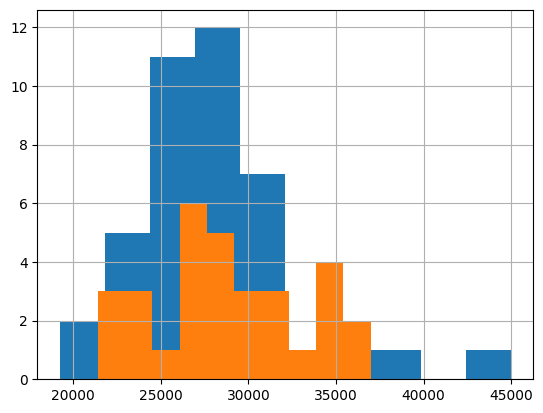

In [40]:
# расперделение цен по типу топлива на x2 pandas.notation
display(test[(test['model'] ==' X2') & (test['fuelType'] == 'Diesel')]['price'].hist())
display(test[(test['model'] ==' X2') & (test['fuelType'] == 'Petrol')]['price'].hist())



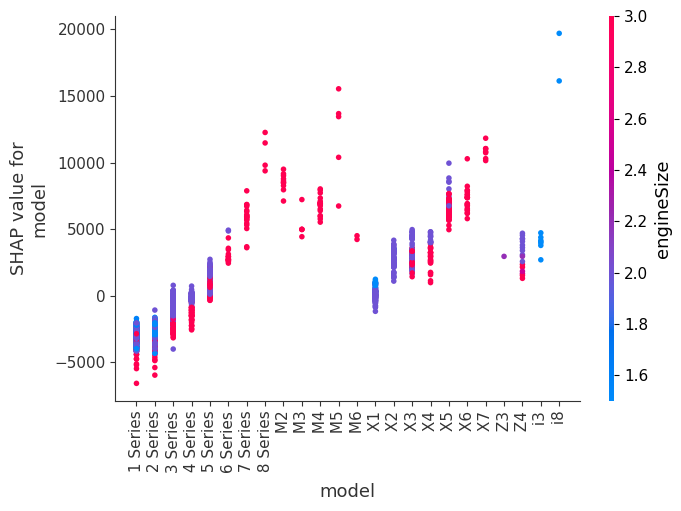

In [41]:
# dependence_plot

# разварачиваем плоттинг по фиче модели
# за фичу модели в дешевых авто минусуется значение

# или дешевым моделям цена минусится
shap.dependence_plot("model", shap_values, test[X])


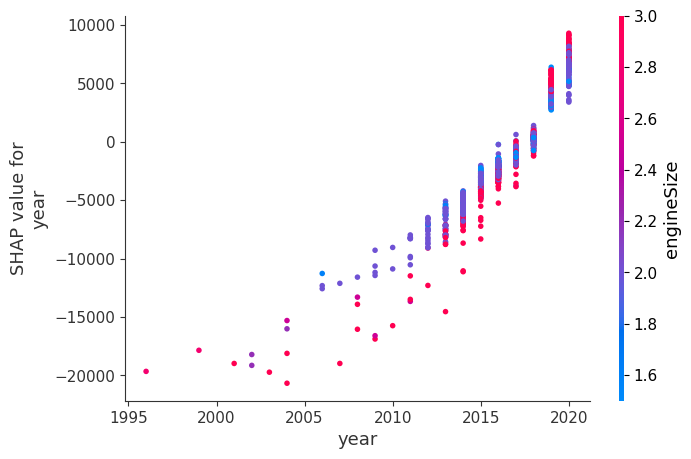

In [42]:
# плоттинг по фиче года
# чем больше год, тем больше прибавляется за эту фичу
shap.dependence_plot("year", shap_values, test[X])

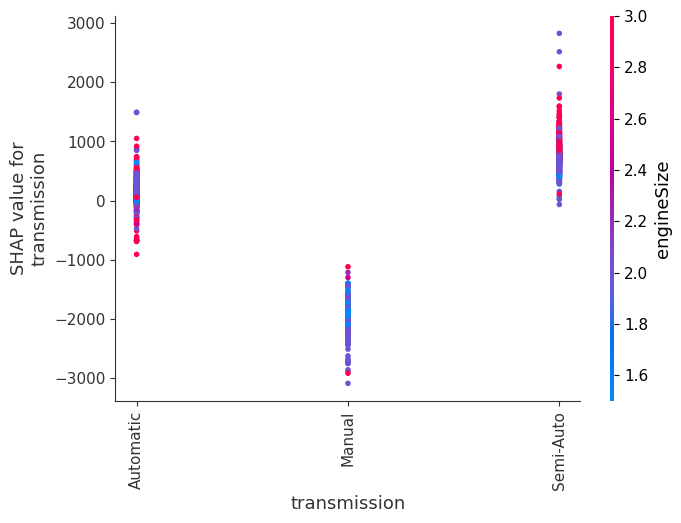

In [43]:
# плоттинг по фиче трансмиссии
# за фичу коробки: механнику занижают, дижки слабее
# робот завышают, двигатели мощнее
shap.dependence_plot("transmission", shap_values, test[X])

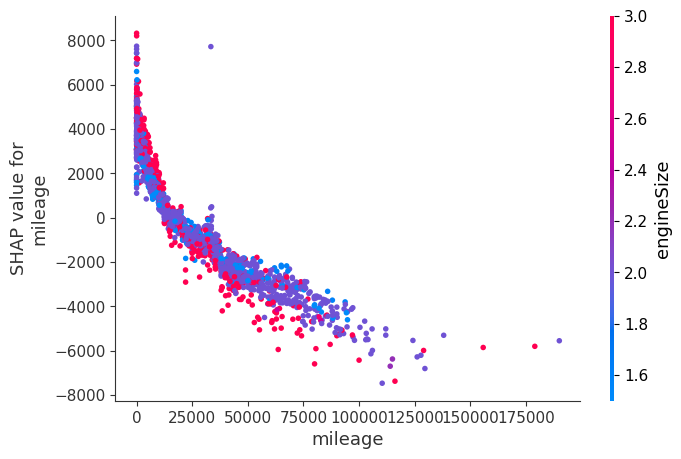

In [44]:
shap.dependence_plot("mileage", shap_values, test[X])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


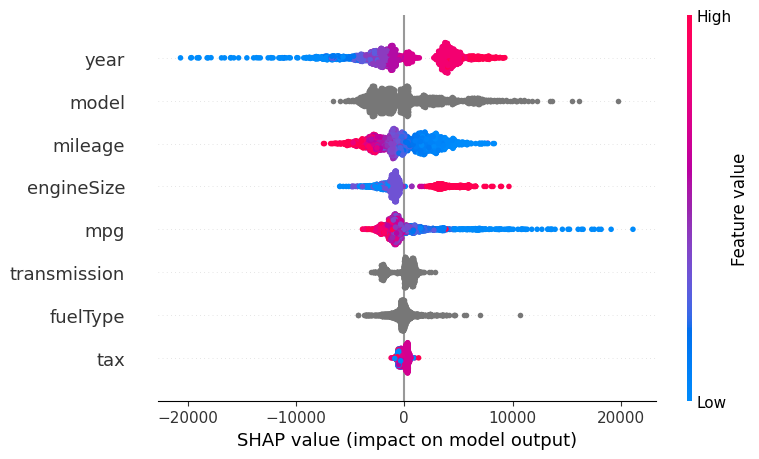

In [45]:
# summary plot
# показывает, какое влияние переменные оказывают на выывод модели

# Пример:
# 1) Если год в нижнем диапазоне(авт старое), то это минусит модель и наоборот
# 2) Если пробег высокий, то это тоже минусит модель и наоборот
# 3) Если двигатель маленький, то это минусит модель и наоборот

shap.summary_plot(shap_values, test[X])